# Boston House Prices Dataset

In [87]:
from sklearn.datasets import load_boston
import numpy as np
import numpy.linalg as la
samples, targets = load_boston(return_X_y=True)
print (samples.shape)
print (targets.shape)

R = np.column_stack((samples,targets))
#np.random.shuffle(R)
samples = R[:,:-1]; targets = R[:,-1]
labels = targets
print (samples.shape)
print (targets.shape)

(506, 13)
(506,)
(506, 13)
(506,)


# Least Squares

In [116]:
X = samples
t = targets.reshape(506,1)
ones = np.ones((506,1))
X = np.column_stack((samples,ones))
print(X.shape)
what = la.inv(X.transpose().dot(X)).dot(X.transpose()).dot(t)
y_hat = X.dot(what)
error = la.norm(t - y_hat)
print("what is: \n",what)
#w1 = what[0:-1]; b = what[-1]
#print(w1,b)
print("Least Squares Error: ", error)

(506, 14)
what is: 
 [[-1.08011358e-01]
 [ 4.64204584e-02]
 [ 2.05586264e-02]
 [ 2.68673382e+00]
 [-1.77666112e+01]
 [ 3.80986521e+00]
 [ 6.92224640e-04]
 [-1.47556685e+00]
 [ 3.06049479e-01]
 [-1.23345939e-02]
 [-9.52747232e-01]
 [ 9.31168327e-03]
 [-5.24758378e-01]
 [ 3.64594884e+01]]
Least Squares Error:  105.25580543587596


# K-fold Cross Validation

In [89]:
def LeastSquares(train,train_target,test):
    X = train
    t = train_target
    #t = train_target.reshape(len(train_target),1)
    #print(X.shape)
    what = la.inv(X.transpose().dot(X)).dot(X.transpose()).dot(t)
    y_hat = X.dot(what)
    lserror = la.norm(t - y_hat)
    
    y_pred = test.dot(what)
    return what, lserror, y_pred

In [96]:
def KFCV():
    test1 = X[0:101]; train1 = X[101:]; 
    test1_t = t[0:101]; train1_t = t[101:]

    test2 = X[101:202]; train2 = np.vstack((X[0:101],X[202:])) 
    test2_t = t[101:202]; train2_t = np.vstack((t[0:101],t[202:]))

    test3 = X[202:303]; train3 = np.vstack((X[0:202],X[303:])) ; 
    test3_t = t[202:303]; train3_t = np.vstack((t[0:202],t[303:])) ; 

    test4 = X[303:404]; train4 = np.vstack((X[0:303],X[404:])); 
    test4_t = t[303:404]; train4_t = np.vstack((t[0:303],t[404:]));

    test5 = X[404:]; train5 = X[0:404]; 
    test5_t = t[404:]; train5_t = t[0:404]
    
    what1, e1, ypred1 = LeastSquares(train1,train1_t,test1)
    what2, e2, ypred2 = LeastSquares(train2,train2_t,test2)
    what3, e3, ypred3 = LeastSquares(train3,train3_t,test3)
    what4, e4, ypred4 = LeastSquares(train4,train4_t,test4)
    what5, e5, ypred5 = LeastSquares(train5,train5_t,test5)

    error1 = la.norm(ypred1 - test1_t)
    print("error1: ",error1)
    error2 = la.norm(ypred2 - test2_t)
    print("error2: ",error2)
    error3 = la.norm(ypred3 - test3_t)
    print("error3: ",error3)
    error4 = la.norm(ypred4 - test4_t)
    print("error4: ",error4)
    error5 = la.norm(ypred5 - test5_t)
    print("error5: ",error5)
    avg_error = (error1+error2+error3+error4+error5)/5
    print("Average Prediction Error is: ",avg_error)
    return avg_error


In [97]:
KFCV()

error1:  35.6376743976011
error2:  51.056633074290204
error3:  58.46146915379775
error4:  89.97315644929394
error5:  57.841040735620545
Average Prediction Error is:  58.5939947621207


58.5939947621207

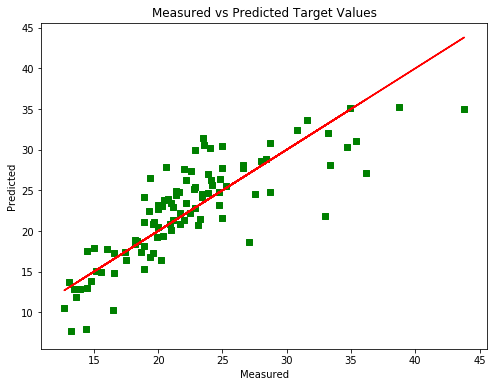

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

#best fold is k = 1

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(test1_t,test1_t,c='r')
ax.scatter(test1_t,ypred1,c='g',marker='s')

ax.set_title("Measured vs Predicted Target Values")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()

# Ridge Regression

Ridge Regression solves for $\hat{w}$ in the following form: $\hat{w} = (X^TX+\lambda I)^{-1} X^Ty$

In [106]:
def LeastSquares_RR(train,train_target,test,l):
    X = train
    #print(X.shape)
    t = train_target
    I = np.identity(X.shape[1])
    #t = train_target.reshape(len(train_target),1)
    #print(X.shape)
    what = la.inv(X.transpose().dot(X)+l*I).dot(X.transpose()).dot(t)
    y_hat = X.dot(what)
    lserror = la.norm(t - y_hat)
    
    y_pred = test.dot(what)
    return what, lserror, y_pred

In [99]:
def KFCV_RR(l):
    test1 = X[0:101]; train1 = X[101:]; 
    test1_t = t[0:101]; train1_t = t[101:]

    test2 = X[101:202]; train2 = np.vstack((X[0:101],X[202:])) 
    test2_t = t[101:202]; train2_t = np.vstack((t[0:101],t[202:]))

    test3 = X[202:303]; train3 = np.vstack((X[0:202],X[303:])) ; 
    test3_t = t[202:303]; train3_t = np.vstack((t[0:202],t[303:])) ; 

    test4 = X[303:404]; train4 = np.vstack((X[0:303],X[404:])); 
    test4_t = t[303:404]; train4_t = np.vstack((t[0:303],t[404:]));

    test5 = X[404:]; train5 = X[0:404]; 
    test5_t = t[404:]; train5_t = t[0:404]
    
    what1, e1, ypred1 = LeastSquares_RR(train1,train1_t,test1,l)
    what2, e2, ypred2 = LeastSquares_RR(train2,train2_t,test2,l)
    what3, e3, ypred3 = LeastSquares_RR(train3,train3_t,test3,l)
    what4, e4, ypred4 = LeastSquares_RR(train4,train4_t,test4,l)
    what5, e5, ypred5 = LeastSquares_RR(train5,train5_t,test5,l)

    error1 = la.norm(ypred1 - test1_t)
    #print("error1: ",error1)
    error2 = la.norm(ypred2 - test2_t)
    #print("error2: ",error2)
    error3 = la.norm(ypred3 - test3_t)
    #print("error3: ",error3)
    error4 = la.norm(ypred4 - test4_t)
    #print("error4: ",error4)
    error5 = la.norm(ypred5 - test5_t)
    #print("error5: ",error5)
    avg_error = (error1+error2+error3+error4+error5)/5
    #print("Average Prediction Error is: ",avg_error)
    return avg_error

In [114]:
L = np.linspace(1,10,num=91)
Errors = []
for l in L:
    Errors.append(KFCV_RR(l))
Errors = np.asarray(Errors)
i = np.argmin(Errors)
lam = L[i]
print("Optimal lambda is: ",lam, "\nwith average prediction error: ",Errors[i])

Optimal lambda is:  9.700000000000001 
with average prediction error:  54.02405460008778
